In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [46]:
N_POP = 200
N_GEN = 100

N_DIM = 50

MUT = 0.05
CROSS = 0.5

random_shift = 2*np.random.random((N_DIM))
print (random_shift)

[1.76879356 0.64151871 1.7850409  0.36333672 1.95861656 0.11224793
 1.12490821 0.64671505 0.24001025 1.7602861  1.02815801 0.31596861
 0.24062613 0.09639253 0.02619921 0.7514698  1.02333016 0.97630355
 1.54246706 1.10844948 1.87100963 0.11671913 0.62423841 1.94854629
 0.95221199 1.95216666 1.17437521 1.50435754 0.58892438 1.10495165
 1.20542981 0.63819738 1.96164918 0.90345834 0.68259053 1.16627472
 0.31816239 0.59740702 1.2482788  1.88879713 0.81093013 1.04383949
 1.51098896 1.83178666 0.67042831 1.95920952 0.16129858 1.82921723
 0.74327102 0.94262097]


In [47]:
def loss(x):
    n_dim = x.shape[0]
    
    # Sphere
    y = np.sum((random_shift + x)**2)
    return y


def generate_random_point(n_dim=N_DIM, lim=20):
    pt = (2*np.random.random((n_dim,))-1)*lim
    return (pt, loss(pt))

pop = [generate_random_point() for ix in range(N_POP)]
print(pop)
temp = []

def crossover(p1, p2):
    n_dim = p1.shape[0]
    
    c1 = np.zeros(p1.shape)
    c2 = np.zeros(p2.shape)
    
    split = int(n_dim * CROSS)
    
    if split == 0:
        c1 = p1
        c2 = p2
    else:
        c1[:split] = p1[:split]
        c1[split:] = p2[split:]
        
        c2[:split] = p2[:split]
        c2[split:] = p1[split:]
    return c1, c2

def mutate(x):
    n_dim = x.shape[0]
    X = np.zeros(x.shape)
    
    for ix in range(n_dim):
        r = np.random.random()
        if r < MUT:
            # mutate
            X[ix] = x[ix] + (2*np.random.random() - 1)
        else:
            X[ix] = x[ix]
    return X

[(array([-7.92119062e+00,  1.99411143e+01, -1.58740621e+01, -4.76283065e+00,
       -1.08240596e+01,  1.84083168e+01,  1.24904125e+01, -8.54780539e+00,
        6.97809418e-01,  1.38733954e+01,  1.50669283e-01,  1.79411819e+01,
       -1.91656636e+00,  1.47022066e-03, -1.86301075e+01, -2.02595299e+00,
        1.40685585e+01, -1.86570813e+01,  1.54660180e+01,  5.76986742e+00,
       -7.43253432e+00,  4.22279172e+00,  1.42868623e+01,  7.79185772e+00,
        1.68674187e+01, -8.97782900e+00,  7.35212765e+00, -1.71441442e+01,
       -1.62898474e+01, -1.52880902e+01, -3.45125950e+00,  9.50170230e+00,
        1.74074660e+01,  6.15893424e+00, -1.43057312e+01,  1.97834795e+01,
        3.61912667e+00,  5.18368559e+00, -8.08651104e+00,  8.10243278e+00,
       -1.83630698e+00, -2.42695063e+00, -5.43197788e+00,  1.88122961e+01,
       -1.19980300e+00, -6.31999945e-01, -1.69333409e+00, -1.55755262e+00,
        1.99172987e+01,  1.12378153e+00]), 6888.155422983587), (array([-1.80094254e+01,  5.7233441

In [48]:
losses = []

In [49]:
for gen in range(N_GEN):
    # sort the population
    ord_pop = sorted(pop, key=lambda x: x[1])
    best = ord_pop[0]
    print (best[1], best[0])
    losses.append(best[1])
    
    # create temp population
    temp = []
    
    while len(temp) < N_POP:
        # select p1 and p2 (parents)
        p1, p2 = random.sample(ord_pop[:int(N_POP/2)], 2)
        
        # apply crossover to generate c1 and c2 (children)
        c1, c2 = crossover(p1[0], p2[0])        
        
        # apply mutation on c1 and c2
        c1 = mutate(c1)
        c2 = mutate(c2)
        
        t = [p1, p2, (c1, loss(c1)), (c2, loss(c2))]
        t_sorted = sorted(t, key=lambda x: x[1])
        # save the best of p1, p2, c1, c2 in temp
        
        temp += t_sorted[:2]
        
    # replace population with temp
    pop = temp

4701.947405866101 [ -3.20293448   2.24734779  -7.05109225  14.72107824 -14.42209288
  -6.64172699   7.05193806  -5.82999452  -9.54048287  16.8172815
 -13.47282833   5.06255146   1.2085253   -3.25291754 -12.88656092
   3.62166217  -3.59335415  -6.66099431  -6.96236698   2.60489421
  -4.70075392   0.03755467 -13.98615064  14.01351312 -15.06099629
  -1.41810444  -5.80984922  -5.99141253   1.12889246   8.61114261
 -17.03295048  -3.84066871   8.60886849  -8.77592494  -6.66425162
 -13.94548889   5.80383323  18.68118831  16.23813996   6.01955874
   7.79414286  -7.58272577   6.68790093  16.68704378   3.16786146
  -0.88227211  10.86496781  13.98660167   8.11340886  -9.11338937]
4209.204861205523 [  0.67445458  -6.70503938   8.53119274   0.59359992  -1.87521389
  -0.39223261  10.51869137   3.3769088    7.857611     2.82613559
  -2.59800042  -5.86615672  11.69098081  -1.21890104 -15.28555077
 -17.91437043 -17.76736003  19.92196949   0.56602712  -1.2295521
  -2.58240093   6.92599456 -12.63497494  

3088.2554423099227 [-17.23382509   2.118692    -7.10451623 -13.22031722  -8.5043417
 -10.61145462  -5.84137095  -0.74644001   6.10167867  -0.79005884
  -0.52576161  -7.62493329  11.88867098  14.63779666  -2.43875581
   2.38363089   4.66354916   5.90964728  -4.60421354 -10.52476082
  -0.49813096  -0.55693911  15.25923548  -9.7039618    5.59593153
  -2.41594365  -0.88181504  10.04493678 -13.9409153    6.72630128
  -0.7918898   -2.18509862 -12.5983482   -1.19810701 -14.12260424
  -5.41360834 -12.60957284   8.46400167  -0.35355685 -10.89473836
  -9.73867114   2.22140411   7.97284833  -6.93806414  -1.76005322
   1.05060475  -8.62116324   1.20670729 -10.79867844   6.88521142]
3070.2648444264305 [-17.23382509   2.118692    -7.10451623 -13.01676494  -9.15669633
  -9.73620432  -5.84137095  -0.74644001   6.10167867  -0.79005884
  -0.52576161  -7.62493329  11.88867098  15.04450997  -2.43875581
   2.38363089   4.66354916   5.90964728  -4.60421354 -10.52476082
  -0.49813096  -0.55693911  14.6352571

2727.8495436368607 [-15.00590653   1.25313463  -6.41990814 -12.43907408  -8.5043417
  -8.41975504  -6.33503096  -0.99009363   5.87362398  -1.43954432
  -0.99394967  -7.61941297  10.68280285  13.85986761  -1.89894376
   1.98007621   6.09420438   6.83897465  -4.60421354  -8.93784248
   0.47259463  -1.52938368  13.94785486  -9.80722335   5.59593153
  -2.41594365  -0.69486894   9.10347057 -12.66447132   6.72630128
  -0.7918898   -1.64508848 -12.5983482   -0.39371614 -13.14215821
  -4.32336882 -11.74429583   8.46400167  -0.35355685 -10.9191409
  -8.54767474   2.22140411   7.59606648  -6.10311005  -2.26564723
   0.77863495  -8.62116324   1.20670729 -10.79867844   6.88521142]
2713.8391370791605 [-13.93439741   1.25313463  -6.41990814 -12.43907408  -8.5043417
  -9.25769667  -5.38212317   0.13941241   5.87362398  -2.33144338
  -1.66352929  -8.56187949  10.68280285  13.85986761  -1.89894376
   1.98007621   6.09420438   7.00529241  -4.60421354  -9.88583434
  -0.0930842   -1.52938368  14.35250463 

2453.3158508749148 [-13.93632148   1.39417697  -6.41990814 -11.82782952  -6.92130649
  -9.25769667  -5.98165127  -0.99009363   5.87362398  -1.03206252
  -0.17843472  -8.75923296  10.68280285  12.47224612  -1.89894376
   1.98007621   5.9783023    5.57652067  -4.60421354  -8.93784248
  -0.0930842   -1.52938368  11.88348287  -9.35544658   5.59593153
  -1.46555617  -0.69486894   9.10347057 -12.32122061   5.78657429
  -0.7918898   -1.57528125 -12.38093684  -0.8325905  -12.28881929
  -4.32336882 -11.74429583   6.22148251   0.19154415 -10.89473836
  -8.54767474   1.62664025   7.59606648  -5.50496185  -2.49349704
   0.77863495  -8.00498128   1.20670729  -9.88712091   6.46251047]
2424.3982040160727 [-13.93632148   1.39417697  -6.41990814 -10.93882109  -7.8896311
  -9.25769667  -5.56260218  -0.99009363   5.87362398  -1.03206252
  -0.17843472  -8.63855223   9.78988019  13.12337659  -1.27385052
   1.98007621   5.15811887   5.1944027   -5.02125637  -8.93784248
  -0.0930842   -1.52938368  12.2832268

1932.1268012883013 [-12.61523632   0.88673884  -6.41990814 -10.03514417  -4.53309049
  -8.33713265  -5.98165127  -0.17390222   5.87362398  -0.70078939
  -0.06224291  -7.76131836   9.05006845  10.49184528  -1.89894376
   1.98007621   5.44280486   4.82987228  -5.1277022   -8.93784248
  -0.82378076  -1.52938368  11.88348287  -7.92339177   5.42781388
  -2.67485548  -0.83531346   7.40946522  -9.61754936   5.08553351
  -0.06293005  -1.6615811  -10.63695538  -1.15203009 -11.56496945
  -4.0669955  -10.38352308   6.10955742   0.78632297  -8.75469818
  -6.87643416   0.31613644   4.96402203  -4.19938802  -2.26564723
  -0.04372     -7.24129089   1.53715968 -10.70359376   6.41137815]
1910.3532832015433 [-13.56782035   0.88673884  -5.47805409  -8.9940569   -6.92130649
  -8.33713265  -5.47660915  -0.27517731   4.57543353  -1.03206252
  -0.20350274  -7.6661686    9.62118565  10.49184528  -1.89894376
   1.27593005   4.27896619   4.26680822  -4.60421354  -8.21880522
  -0.24026577  -1.05030838  11.004522

1552.4729420548101 [-12.70227854   0.28368003  -6.41990814  -6.83573345  -4.83242042
  -6.49321691  -5.04516605   1.21155614   5.87362398  -0.30571249
  -0.75312239  -7.07970912  10.09413571   8.16840958  -1.4644372
   0.09875273   5.06098288   4.53312805  -4.33404522  -7.50009943
   0.64334916  -0.56048047   9.39885062  -7.67635028   4.67485987
  -3.3530323   -0.16663159   4.79506098  -9.31600719   5.08553351
  -0.06293005  -1.6615811   -9.77087586  -1.34429968 -11.0321688
  -4.0669955   -8.25183166   6.10955742   0.78632297  -7.43322375
  -5.57405398   0.31613644   5.00472475  -4.16404821  -3.159337
  -0.25930834  -6.67552074   0.764843    -9.76328296   6.7489895 ]
1521.2795547540393 [-12.70227854   0.28368003  -6.41990814  -6.83573345  -4.94710954
  -6.8050485   -4.16027544   0.41621559   5.87362398   0.57374333
  -0.75312239  -7.07970912   9.38975116   8.582058    -1.08718625
   0.09875273   5.06098288   4.22580594  -3.35268614  -6.54114798
  -0.24416788  -0.56048047   9.40443765  

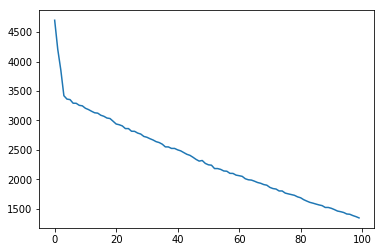

In [50]:
plt.plot(losses)